In [15]:
using DataFrames, CSV
data = CSV.read("data/sensor_data_200.txt", DataFrame, header=["date", "time", "ir", "lidar"], delim=' ')
print(data)

58988×4 DataFrame
│ Row   │ date     │ time   │ ir  │ lidar │
├───────┼──────────┼────────┼─────┼───────┤
│ 1     │ 20180122 │ 95819  │ 305 │ 214   │
│ 2     │ 20180122 │ 95822  │ 299 │ 211   │
│ 3     │ 20180122 │ 95826  │ 292 │ 199   │
│ 4     │ 20180122 │ 95829  │ 321 │ 208   │
│ 5     │ 20180122 │ 95832  │ 298 │ 212   │
│ 6     │ 20180122 │ 95835  │ 327 │ 212   │
│ 7     │ 20180122 │ 95838  │ 293 │ 215   │
│ 8     │ 20180122 │ 95840  │ 309 │ 218   │
│ 9     │ 20180122 │ 95843  │ 323 │ 208   │
│ 10    │ 20180122 │ 95846  │ 292 │ 217   │
│ 11    │ 20180122 │ 95850  │ 294 │ 215   │
⋮
│ 58977 │ 20180124 │ 120002 │ 302 │ 209   │
│ 58978 │ 20180124 │ 120005 │ 303 │ 207   │
│ 58979 │ 20180124 │ 120009 │ 310 │ 206   │
│ 58980 │ 20180124 │ 120012 │ 330 │ 208   │
│ 58981 │ 20180124 │ 120015 │ 305 │ 205   │
│ 58982 │ 20180124 │ 120018 │ 301 │ 202   │
│ 58983 │ 20180124 │ 120021 │ 320 │ 206   │
│ 58984 │ 20180124 │ 120023 │ 313 │ 208   │
│ 58985 │ 20180124 │ 120026 │ 297 │ 200   │
│ 58986 │ 20

In [2]:
data.lidar[1:5]

5-element Array{Union{Missing, Int64},1}:
 214
 211
 199
 208
 212

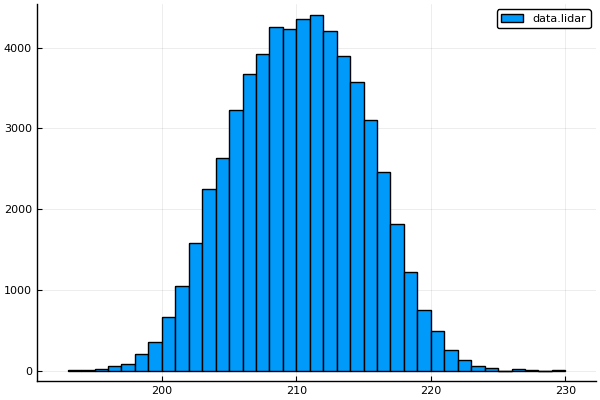

In [3]:
using Plots
pyplot()
histogram(data.lidar, bin=maximum(data.lidar)-minimum(data.lidar), label="data.lidar")

In [4]:
using Statistics
mean1=sum(data.lidar)/length(data.lidar)
mean2=mean(data.lidar)
print(mean1, " ", mean2)

209.73713297619855 209.73713297619855

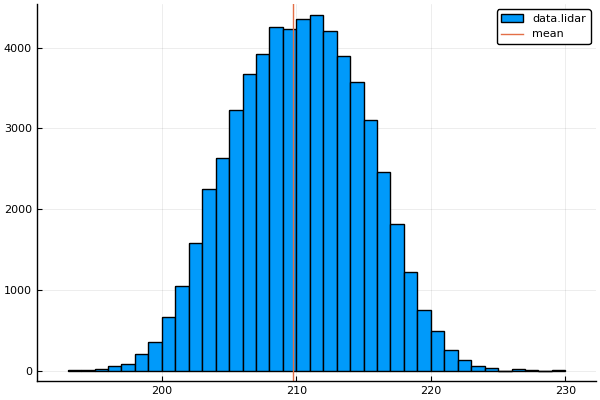

In [5]:
histogram(data.lidar, bin=maximum(data.lidar)-minimum(data.lidar), label="data.lidar");
vline!([mean1], label="mean") # with hold

In [6]:
# 定義から計算
zs = data.lidar
mean_val = sum(zs)/length(zs)
diff_square = (zs .- mean_val).^2 # diff_square = [(z - mean_val)^2 for z in zs]

sampling_var = sum(diff_square)/length(zs)
unbiased_var = sum(diff_square)/(length(zs)-1)

println(sampling_var)
println(unbiased_var)

# Statisticsを使用
statistics_sampling_var = var(data.lidar, corrected=false)
statistics_default_var = var(data.lidar)

println(statistics_sampling_var)
println(statistics_default_var)

23.407709770274206
23.40810659855451
23.407709770274234
23.40810659855454


In [7]:
#定義から計算
stddev1 = sqrt(sampling_var)
stddev2 = sqrt(unbiased_var)

#Statisticsを使用
statistics_stddev = std(data.lidar)

println(stddev1)
println(stddev2)
println(statistics_stddev)

4.838151482774615
4.83819249292073
4.838192492920733


In [8]:
using StatsBase
freqs = DataFrame(countmap(data.lidar))
print(freqs[1, :])

1×35 DataFrame. Omitted printing of 24 columns
│ Row │ 193 │ 194 │ 195 │ 196 │ 197 │ 198 │ 199 │ 200 │ 201  │ 202  │ 203  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│ 1   │ 4   │ 10  │ 13  │ 59  │ 84  │ 205 │ 353 │ 668 │ 1053 │ 1584 │ 2252 │

In [9]:
prob_array = Matrix(freqs[1, :]) / length(data.lidar)

probs = DataFrame(prob_array, names(freqs))
#push!(freqs, Matrix(freqs[1,:]) # error! 型が異なる　
#append!(freqs, probs) # error! 型が異なる　

,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,226,227,229
1,6.78104e-5,0.000169526,0.000220384,0.0010002,0.00142402,0.00347528,0.00598427,0.0113243,0.0178511,0.0268529,0.0381773,0.044721,0.0546721,0.0622839,0.0664542,0.072235,0.0716756,0.0738286,0.074744,0.0712179,0.0660643,0.0605547,0.0526887,0.0416864,0.0307181,0.02075,0.0126975,0.00823896,0.00427206,0.00215298,0.000932393,0.000542483,0.000254289,5.08578e-5,1.69526e-5


In [10]:
sum(prob_array)

1.0

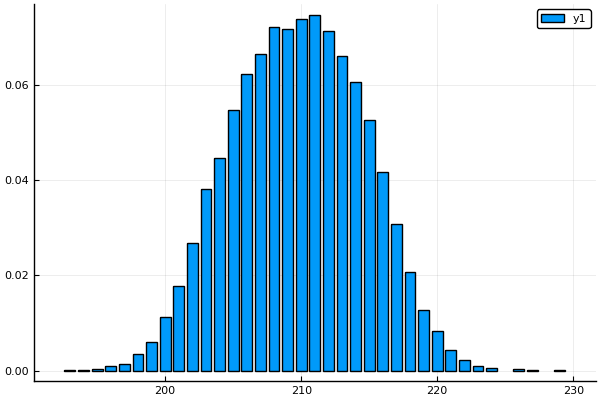

In [11]:
bar(parse.(Int64, string.(names(probs))), reshape(prob_array, length(prob_array)))

In [16]:
function drawing()
    #return parse.(Int64, string.(names(freqs)))[sample(axes(freqs, 2), Weights(reshape(prob_array, length(prob_array))), 1)][1] #ワンライナー

    freqs_names = parse.(Int64, string.(names(freqs))) # データフレームのレコードの名前を取得
    weights = Weights(reshape(prob_array, length(prob_array))) # 確率分布を指定
    freqs_data = axes(freqs, 2) # 列データを使用
    return freqs_names[sample(freqs_data, weights, 1)][1] #データを一つサンプル（Array）して、その要素を抽出する

end

drawing (generic function with 1 method)

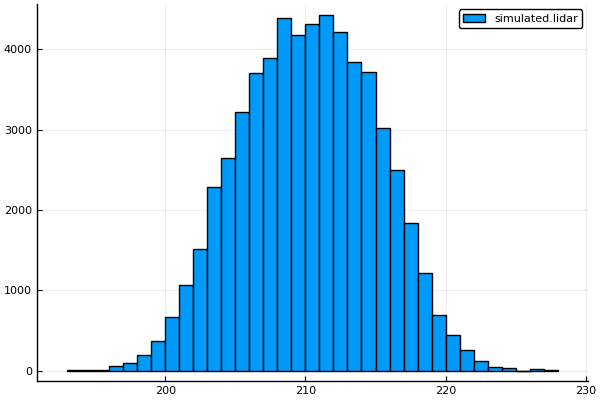

In [17]:
samples = [drawing() for i in 1:length(data.lidar)]
simulated = DataFrame(lidar=samples)
histogram(simulated.lidar, bin=maximum(simulated.lidar)-minimum(simulated.lidar), label="simulated.lidar")